<IPython.core.display.Javascript object>


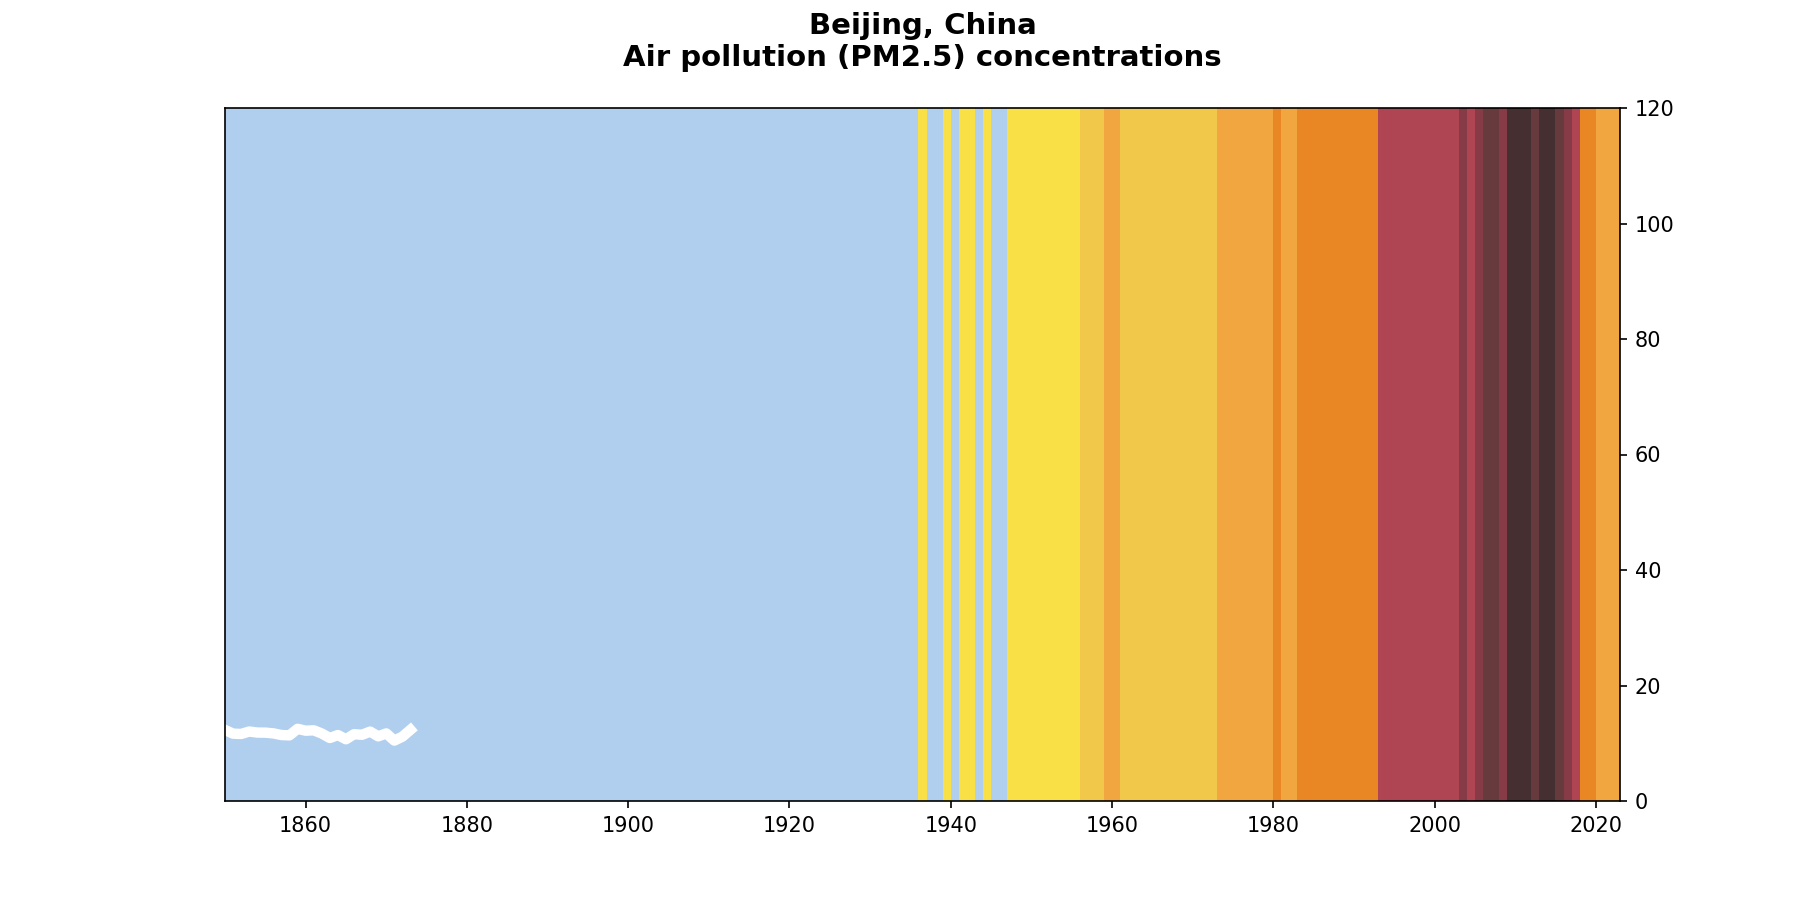

In [2]:
%matplotlib notebook  
# Alternatively: %matplotlib widget (requires pip install ipympl)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation as animation

# ========== 1) Read the CSV file ==========
df = pd.read_csv("selected_cities_pm25.csv")  # Use absolute path if not in the current directory
years = df["Year"].to_numpy()
city_cols = [col for col in df.columns if col != "Year"]

# ========== 2) Define the color scale and discrete colors ==========
bounds = [0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 99999]
c_list = [
    (164/255, 255/255, 255/255),  # 0 - 5    Very Good
    (176/255, 218/255, 233/255),  # 5 - 10   Fair (low)
    (176/255, 206/255, 237/255),  # 10 - 15  Fair (high)
    (249/255, 224/255, 71/255),   # 15 - 20  Moderate (low)
    (242/255, 200/255, 75/255),   # 20 - 30  Moderate (high)
    (241/255, 166/255, 63/255),   # 30 - 40  Poor (low)
    (233/255, 135/255, 37/255),   # 40 - 50  Poor (high)
    (175/255, 69/255, 83/255),    # 50 - 60  Very Poor (low)
    (134/255, 59/255, 71/255),    # 60 - 70  Very Poor (high)
    (103/255, 58/255, 61/255),    # 70 - 80  Extremely Poor (low)
    (70/255, 47/255, 48/255),     # 80 - 90  Extremely Poor (mid)
    (37/255, 36/255, 36/255),     # 90+      Extremely Poor (high)
]
cmap = mcolors.ListedColormap(c_list)
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# ========== 3) Define a function to create and return the animation object ==========
def create_animation_for_city(city_name, years, pm25_values):
    """
    city_name: str, City name
    years: 1D array-like, Years
    pm25_values: 1D array-like, PM2.5 concentrations
    return: matplotlib.animation.FuncAnimation object
    """
    fig, ax = plt.subplots(figsize=(12, 6))

    # (A) Background color strip (draws the full strip initially)
    ax.imshow(
        pm25_values.reshape(1, -1), 
        aspect="auto", 
        cmap=cmap, 
        norm=norm,
        extent=[years[0], years[-1]+1, 0, 1]
    )
    ax.set_yticks([])
    ax.set_xlim([years[0], years[-1] + 1])

    # (B) White trend line, initially empty
    ax2 = ax.twinx()
    line, = ax2.plot([], [], color="white", linewidth=5)
    ax2.set_xlim([years[0], years[-1] + 1])
    ax2.set_ylim([0, 120])  # Fixed range 0 ~ 120

    ax.set_title(f"{city_name}\nAir pollution (PM2.5) concentrations",
                 fontsize=14, fontweight="bold", pad=20)
    ax.set_facecolor("white")
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Initialization function: clears line data
    def init():
        line.set_data([], [])
        return (line,)

    # Frame update function: progressively draws the white line from left to right
    def update(frame):
        # frame goes from 0 to len(years)-1
        xdata = years[:frame+1]
        ydata = pm25_values[:frame+1]
        line.set_data(xdata, ydata)
        return (line,)

    # Create the animation object
    anim = animation.FuncAnimation(
        fig,
        update,
        init_func=init,
        frames=len(years),
        interval=50,  
        blit=True
    )

    return anim  

city_name = city_cols[3]  # Select the fourth city in the list
pm25_values = df[city_name].to_numpy()

# Generate the animation
anim = create_animation_for_city(city_name, years, pm25_values)

anim
